# Weather Quest: Classifying Nature’s Moods

## Objective

The purpose of this kernel is to classify weather types using a synthetically generated dataset that mimics real-world weather data. The dataset includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This kernel aims to:
Explore and preprocess the weather dataset.
Handle missing values and outliers.
Perform feature engineering and selection.
Build and evaluate different classification models.
Tune the models for optimal performance.

## About Dataset

Description

This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.

Variables

Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
Precipitation (%) (numeric): The precipitation percentage, including outlier values.
Cloud Cover (categorical): The cloud cover description.
Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
Season (categorical): The season during which the data was recorded.
Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
Location (categorical): The type of location where the data was recorded.
Weather Type (categorical): The target variable for classification, indicating the weather type.

## Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

Overview of Classification Models:

LogisticRegression: A linear model suitable for binary and multiclass classification tasks.
DecisionTreeClassifier: A non-parametric model that makes decisions based on a set of if-then-else decision rules.
RandomForestClassifier: An ensemble model that fits multiple decision trees on various sub-samples of the dataset and uses averaging to improve accuracy and control over-fitting.
GradientBoostingClassifier: Another ensemble model that builds trees sequentially, where each new tree helps to correct errors made by the previously trained model.
SVC (Support Vector Classifier): Uses support vectors to classify data points and can handle non-linear decision boundaries.
KNeighborsClassifier: A simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).
GaussianNB: Implements the Naive Bayes algorithm for classification based on Bayes' theorem with strong (naive) independence assumptions between the features.

## Data Loading And Exploration

In [2]:
data=pd.read_csv('weather_classification_data.csv')

In [3]:
data.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
print("\nSummary statistics of numerical variables:")
data.describe()


Summary statistics of numerical variables:


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [8]:
# Summary of categorical variables
print("\nSummary of categorical variables:")
data.describe(include=['object', 'category'])


Summary of categorical variables:


,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


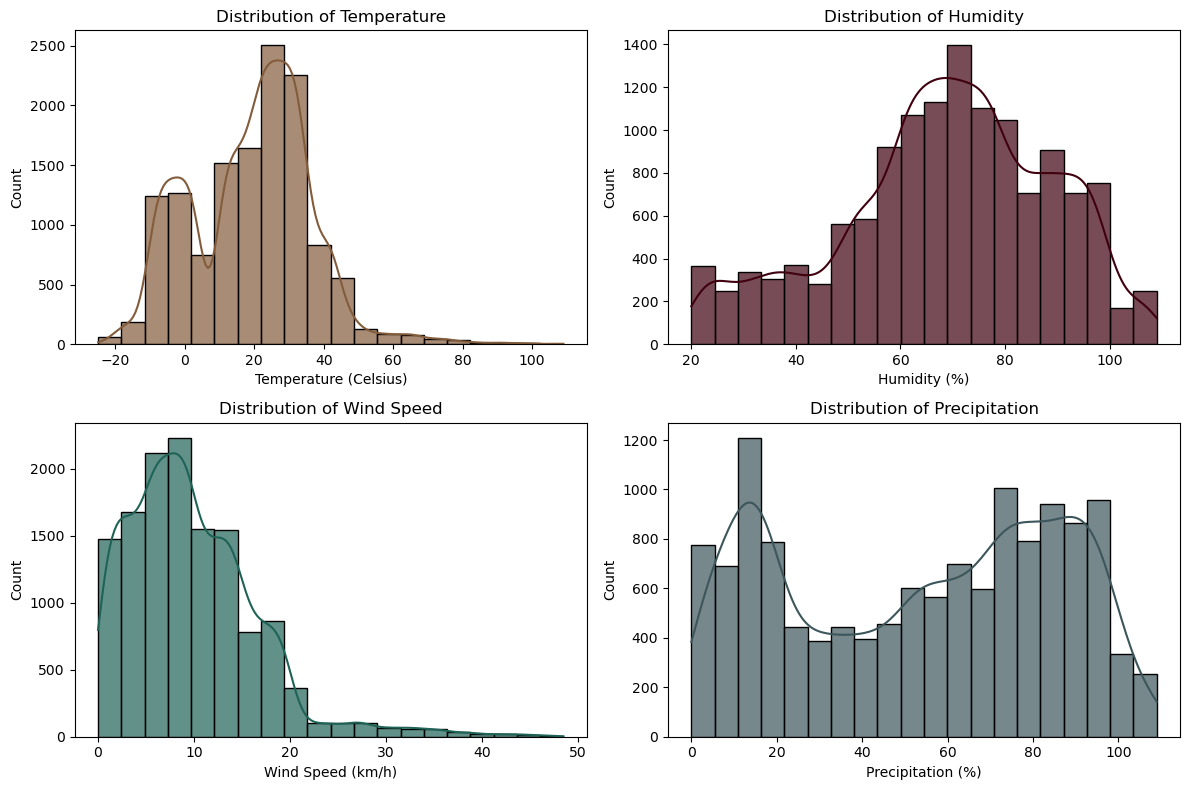

In [9]:
# Visual exploration: histograms for numerical variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['Temperature'], bins=20, kde=True, color='#835C3B', alpha=0.7)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.histplot(data['Humidity'], bins=20, kde=True, color='#3F000F', alpha=0.7)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(data['Wind Speed'], bins=20, kde=True, color='#1F6357', alpha=0.7)
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.histplot(data['Precipitation (%)'], bins=20, kde=True, color='#3C565B', alpha=0.7)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (%)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Temperature:

The temperature distribution is skewed to the right, meaning that there are more observations of higher temperatures than lower temperatures. The most common temperatures fall between 20 and 40 degrees Celsius.
Humidity:

The most common humidity levels fall between 60% and 100%.
Wind Speed:

The wind speed distribution is skewed to the right, with most common observations fall between 0 to 20 (km/h).
Precipitation:
The most common precipitation levels fall between 0% and 20%.

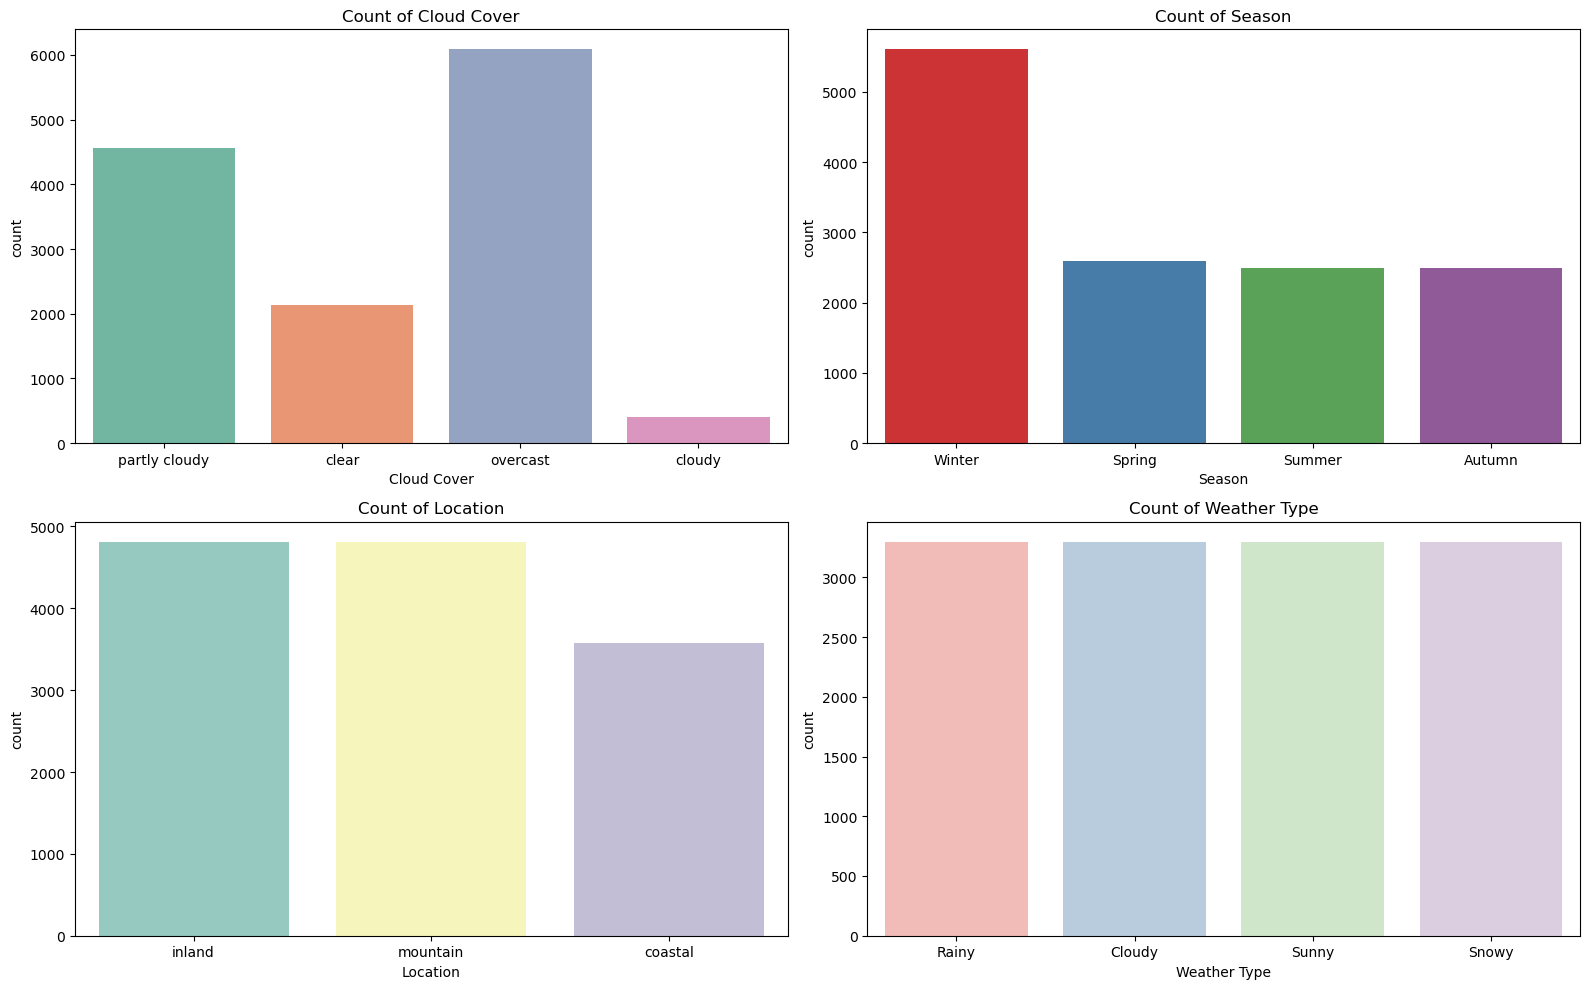

In [10]:
# Visual exploration: count plots for categorical variables
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Cloud Cover', data=data, palette='Set2')
plt.title('Count of Cloud Cover')

plt.subplot(2, 2, 2)
sns.countplot(x='Season', data=data, palette='Set1')
plt.title('Count of Season')

plt.subplot(2, 2, 3)
sns.countplot(x='Location', data=data, palette='Set3')
plt.title('Count of Location')

plt.subplot(2, 2, 4)
sns.countplot(x='Weather Type', data=data, palette='Pastel1')
plt.title('Count of Weather Type')

plt.tight_layout()
plt.show()

# Data Cleaning And Preprocessing

In [11]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [13]:
# Separate features and target variable
X = data.drop('Weather Type', axis=1)
y = data['Weather Type']

In [14]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define categorical features for label encoding
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    X_train[feature] = label_encoder.fit_transform(X_train[feature])
    X_test[feature] = label_encoder.transform(X_test[feature])

In [16]:
# Print preprocessed data sample
print("Sample of X_train after label encoding:")
X_train.head()

Sample of X_train after label encoding:


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
3958,32.0,66,6.0,92.0,3,1010.21,2,1,1.5,1
2239,15.0,96,11.0,57.0,2,1016.98,0,0,4.0,2
3608,28.0,58,6.5,11.0,0,1025.37,10,2,9.0,1
6848,47.0,84,44.5,85.0,2,992.26,2,3,2.0,0
6119,18.0,66,14.0,10.0,3,1000.04,1,0,8.0,0


In [17]:
# Define numerical features for standard scaling
numeric_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

In [18]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data with StandardScaler
X_train_scaled = X_train.copy()  
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])

In [19]:
# Transform the test data using the fitted scaler
X_test_scaled = X_test.copy() 
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# Print preprocessed data sample
print("Sample of X_train after numerical feature scaling:")
X_train_scaled.head()

Sample of X_train after numerical feature scaling:


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
3958,0.727984,-0.129706,-0.553679,1.204747,3,0.123123,-0.523097,1,-1.179544,1
2239,-0.248339,1.352488,0.170676,0.109053,2,0.304828,-1.041944,0,-0.436072,2
3608,0.498261,-0.524958,-0.481244,-1.331000,0,0.530012,1.552291,2,1.050873,1
6848,1.589447,0.759610,5.023858,0.985608,2,-0.358649,-0.523097,3,-1.030850,0
6119,-0.076047,-0.129706,0.605290,-1.362306,3,-0.149837,-0.782520,0,0.753484,0


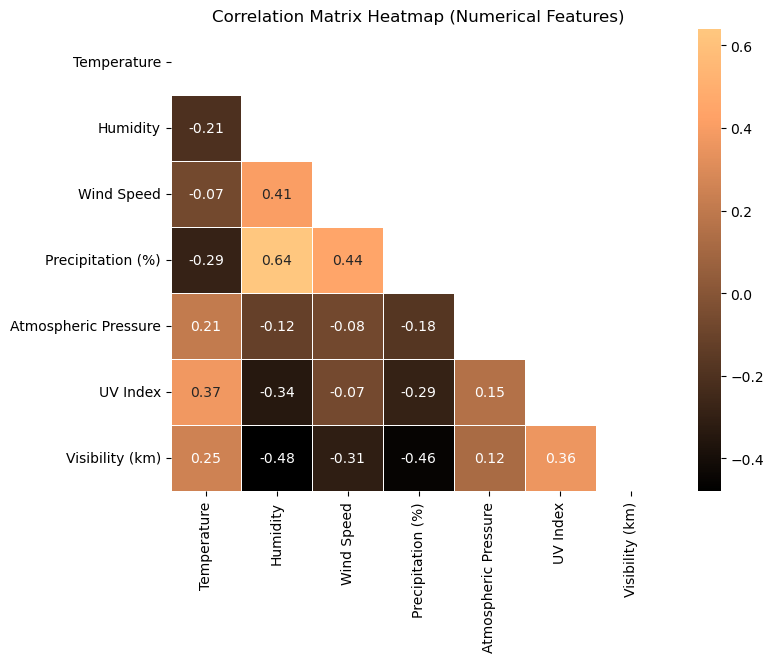

In [20]:
# Separate numerical features for correlation analysis
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Compute the correlation matrix for numerical features
corr_matrix = data[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8,6))

# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='copper', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap (Numerical Features)')
plt.show()

Temperature has a positive correlation with Atmospheric Pressure, UV Index and Visibility. The most positive correlation is between Precipitation and Humidity. The most negative correlation is between Humidity and Visibility.

# Modeling And Evaluation

In [21]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [22]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print classification report for detailed metrics
    f"\nClassification Report for {clf_name}:"
    print(classification_report(y_test, y_pred))

    print("="*80) 

Training Logistic Regression...
Accuracy: 0.8485
              precision    recall  f1-score   support

      Cloudy       0.80      0.81      0.81       651
       Rainy       0.84      0.83      0.84       647
       Snowy       0.89      0.94      0.92       701
       Sunny       0.85      0.80      0.83       641

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640

Training Decision Tree...
Accuracy: 0.9057
              precision    recall  f1-score   support

      Cloudy       0.87      0.88      0.88       651
       Rainy       0.90      0.89      0.89       647
       Snowy       0.93      0.94      0.94       701
       Sunny       0.92      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.90      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Training Random Forest...
Accuracy: 0.

Observations:

Performance: Decision Tree, Random Forest, and Gradient Boosting classifiers achieve the highest accuracy and F1-scores, indicating robust performance across all weather types.
Balance: Most classifiers exhibit balanced precision and recall across different classes (Cloudy, Rainy, Snowy, Sunny), suggesting they generalize well to all weather types in your dataset.

## Feature Importance

In [23]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Feature importance
importance = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance (Random Forest):")
feature_importance_df

Feature Importance (Random Forest):


,Feature,Importance
0,Temperature,0.200134
8,Visibility (km),0.149900
3,Precipitation (%),0.148149
6,UV Index,0.142497
5,Atmospheric Pressure,0.105472
4,Cloud Cover,0.094610
1,Humidity,0.056037
7,Season,0.053334
2,Wind Speed,0.034311
9,Location,0.015555


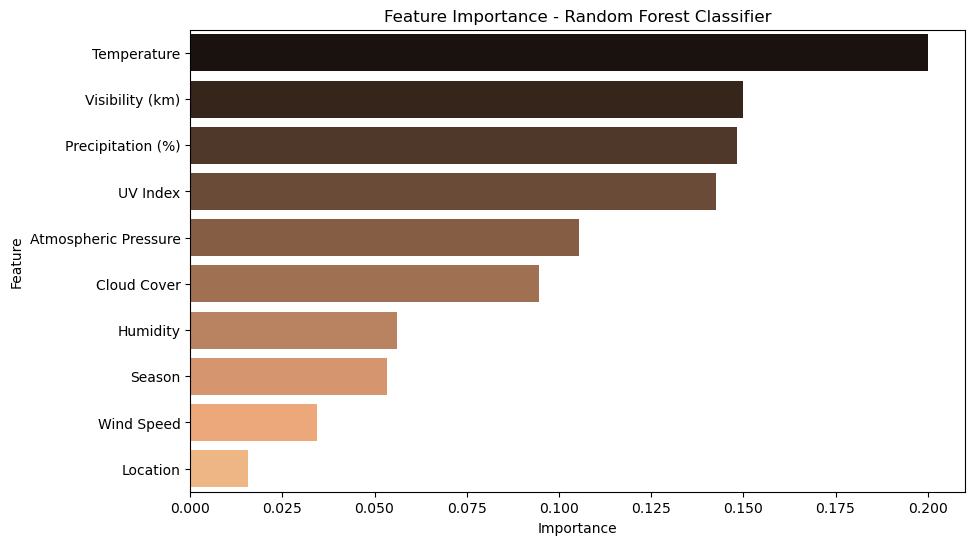

In [24]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='copper')
plt.title('Feature Importance - Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Temperature has the highest importance, indicating that it strongly influences the prediction of weather types. This aligns with common knowledge that temperature plays a pivotal role in determining weather conditions.
Visibility (km) and Precipitation (%) follow closely in importance, suggesting that these factors significantly contribute to weather classification, particularly in determining clarity and presence of precipitation.
UV Index and Atmospheric Pressure also show notable importance, indicating their roles in predicting certain weather patterns.
Cloud Cover, Humidity, Season, Wind Speed, and Location have relatively lower importance values compared to other features in this model. This doesn't necessarily mean they are less important overall but suggests they have less influence in this specific model's predictions.